<a href="https://colab.research.google.com/github/quezia-cassiano/datascience/blob/main/atvd7_bd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=809438e1e8ee57d17a0e4319b19f9481d696618a35b042dab3d6fd2dcea886a9
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# Iniciar uma sessão local e importar dados
from pyspark.sql import SparkSession
sc = SparkSession.builder.master('local[*]').getOrCreate()

In [ ]:
df = sc.read.csv('/content/terremoto_bd.csv', header=True, sep=";",  inferSchema=True)
df.show(5)

+--------------------+--------+----------+----------+---+-------+---+---+-----+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|                time|latitude|longitude2|longitude3|mag|magType|nst|gap| dmin| rms|net|        id|             updated|               place|      type|horitontalError|depthError|magError|magNst|  status|locationSource|magSource|
+--------------------+--------+----------+----------+---+-------+---+---+-----+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2022-12-31 17:05:...| 335.482|   483.346|    19.314|4.1|     mb| 29|204| 2.67|0.89| us|us7000j1a0|2023-03-07T19:00:...|6 km NNW of Khorr...|earthquake|             12|     6.301|   0.145|    15|reviewed|            us|       us|
|2022-12-30 23:52:...| 346.296|   248.996|        10|  4|     mb| 68|124|0.657|0

In [ ]:
df.show(5, truncate=False)

+------------------------+--------+----------+----------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
| time                   |latitude|longitude2|longitude3|mag|magType|nst|gap|dmin |rms |net|id        |updated                 |place                        |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|
+------------------------+--------+----------+----------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2022-12-31 17:05:40.098 |335.482 |483.346   |19.314    |4.1|mb     |29 |204|2.67 |0.89|us |us7000j1a0|2023-03-07T19:00:02.040 |6 km NNW of Khorramabad, Iran|earthquake|12             |6.301     |0.145   |15    |reviewed|us            |us       |
|2022-12-30 

In [ ]:
df.columns

[' time',
 'latitude',
 'longitude2',
 'longitude3',
 'mag',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horitontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource']

In [ ]:
df.dtypes

[(' time', 'string'),
 ('latitude', 'string'),
 ('longitude2', 'string'),
 ('longitude3', 'string'),
 ('mag', 'string'),
 ('magType', 'string'),
 ('nst', 'string'),
 ('gap', 'string'),
 ('dmin', 'string'),
 ('rms', 'string'),
 ('net', 'string'),
 ('id', 'string'),
 ('updated', 'string'),
 ('place', 'string'),
 ('type', 'string'),
 ('horitontalError', 'string'),
 ('depthError', 'string'),
 ('magError', 'string'),
 ('magNst', 'string'),
 ('status', 'string'),
 ('locationSource', 'string'),
 ('magSource', 'string')]

In [ ]:
df.printSchema()

root
 |-- time: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude2: string (nullable = true)
 |-- longitude3: string (nullable = true)
 |-- mag: string (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: string (nullable = true)
 |-- gap: string (nullable = true)
 |-- dmin: string (nullable = true)
 |-- rms: string (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: string (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horizontalError: string (nullable = true)
 |-- depthError: string (nullable = true)
 |-- magError: string (nullable = true)
 |-- magNst: string (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-

In [ ]:
df.select(df.mag).show(10)

+---+
|mag|
+---+
|4.1|
|  4|
|4.1|
|4.4|
|5.1|
|4.4|
|4.4|
|  5|
|  4|
|  4|
+---+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import col
df.select(col('mag')).show(10)

+---+
|mag|
+---+
|4.1|
|  4|
|4.1|
|4.4|
|5.1|
|4.4|
|4.4|
|  5|
|  4|
|  4|
+---+
only showing top 10 rows



In [ ]:
df.select(col('mag'),col('depth')).show(10)

+---+------+
|mag| depth|
+---+------+
|4.1|19.314|
|  4|    10|
|4.1|    10|
|4.4|    10|
|5.1|    10|
|4.4|    10|
|4.4|    10|
|  5|10.314|
|  4|    10|
|  4|    10|
+---+------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import *

In [ ]:
from pyspark.sql.types import TimestampType

# Assumindo que 'time' é a coluna que deseja converter
df = df.withColumn('Tempo', col('Tempo').cast(TimestampType()))
df = df.withColumn('Tempo', to_timestamp('Tempo', 'yyyy-MM-dd HH:mm:ss'))

In [ ]:
df.printSchema()

root
 |-- Tempo: timestamp (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- depth: string (nullable = true)
 |-- mag: string (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: string (nullable = true)
 |-- gap: string (nullable = true)
 |-- dmin: string (nullable = true)
 |-- rms: string (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: string (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horitontalError: string (nullable = true)
 |-- depthError: string (nullable = true)
 |-- magError: string (nullable = true)
 |-- magNst: string (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)



In [ ]:
from pyspark.sql.functions import *
df = df.withColumn('Hour', hour(df.Tempo))
df = df.withColumn('Minute', minute(df.Tempo))
df.show(3, truncate=False)

+-----------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+
|Tempo                  |latitude|longitude|depth |mag|magType|nst|gap|dmin |rms |net|id        |updated                 |place                        |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|Hour|Minute|
+-----------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+
|2022-12-31 17:05:40.098|335.482 |483.346  |19.314|4.1|mb     |29 |204|2.67 |0.89|us |us7000j1a0|2023-03-07T19:00:02.040 |6 km NNW of Khorramabad, Iran|earthquake|12             |6.301     |0.145   |15    |reviewed|us            |us       |1

In [ ]:
df = df.withColumn('Year', year(to_date(df.Tempo, 'yyyy.MM.dd')))
df = df.withColumn('Month', month(to_date(df.Tempo, 'yyyy.MM.dd')))
df.show(3, truncate=False)

+-----------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+
|Tempo                  |latitude|longitude|depth |mag|magType|nst|gap|dmin |rms |net|id        |updated                 |place                        |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|Hour|Minute|Year|Month|
+-----------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+
|2022-12-31 17:05:40.098|335.482 |483.346  |19.314|4.1|mb     |29 |204|2.67 |0.89|us |us7000j1a0|2023-03-07T19:00:02.040 |6 km NNW of Khorramabad, Iran|earthquake|12             |6.301     |0.145   |15    |re

In [ ]:
df = df.withColumn('Mult', (col('depth')*col('mag')))
df.show(3)

+--------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+-------+
|               Tempo|latitude|longitude| depth|mag|magType|nst|gap| dmin| rms|net|        id|             updated|               place|      type|horitontalError|depthError|magError|magNst|  status|locationSource|magSource|Hour|Minute|Year|Month|   Mult|
+--------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+-------+
|2022-12-31 17:05:...| 335.482|  483.346|19.314|4.1|     mb| 29|204| 2.67|0.89| us|us7000j1a0|2023-03-07T19:00:...|6 km NNW of Khorr...|earthquake|             12|     6.301|   0.145|    15|reviewed|            us|       us|  17|   

In [ ]:
df = df.withColumnRenamed('longitude2', 'longitude')
df.show(3, truncate=False)

+------------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
| time                   |latitude|longitude|depth |mag|magType|nst|gap|dmin |rms |net|id        |updated                 |place                        |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|
+------------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2022-12-31 17:05:40.098 |335.482 |483.346  |19.314|4.1|mb     |29 |204|2.67 |0.89|us |us7000j1a0|2023-03-07T19:00:02.040 |6 km NNW of Khorramabad, Iran|earthquake|12             |6.301     |0.145   |15    |reviewed|us            |us       |
|2022-12-30 23:52:34.913 |346.29

In [ ]:
df = df.withColumnRenamed(' time', 'Tempo')
df.show(3, truncate=False)

+------------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|Tempo                   |latitude|longitude|depth |mag|magType|nst|gap|dmin |rms |net|id        |updated                 |place                        |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|
+------------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+-----------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2022-12-31 17:05:40.098 |335.482 |483.346  |19.314|4.1|mb     |29 |204|2.67 |0.89|us |us7000j1a0|2023-03-07T19:00:02.040 |6 km NNW of Khorramabad, Iran|earthquake|12             |6.301     |0.145   |15    |reviewed|us            |us       |
|2022-12-30 23:52:34.913 |346.29

In [ ]:
df.dtypes

[('Tempo', 'timestamp'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('depth', 'string'),
 ('mag', 'string'),
 ('magType', 'string'),
 ('nst', 'string'),
 ('gap', 'string'),
 ('dmin', 'string'),
 ('rms', 'string'),
 ('net', 'string'),
 ('id', 'string'),
 ('updated', 'string'),
 ('place', 'string'),
 ('type', 'string'),
 ('horitontalError', 'string'),
 ('depthError', 'string'),
 ('magError', 'string'),
 ('magNst', 'string'),
 ('status', 'string'),
 ('locationSource', 'string'),
 ('magSource', 'string'),
 ('Hour', 'int'),
 ('Minute', 'int'),
 ('Year', 'int'),
 ('Month', 'int'),
 ('Mult', 'double')]

In [ ]:
df= df.drop(*('_c24', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c32', 'time,latitude,longitude,longitude,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource'))
df.show()

+-----+--------+----------+----------+---+-------+---+---+------+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+------------------+
|Tempo|latitude|longitude2|longitude3|mag|magType|nst|gap|  dmin| rms|net|        id|             updated|               place|      type|horizontalError|depthError|magError|magNst|  status|locationSource|magSource|              Mult|
+-----+--------+----------+----------+---+-------+---+---+------+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+------------------+
|   17| 335.482|   483.346|    19.314|4.1|     mb| 29|204|  2.67|0.89| us|us7000j1a0|2023-03-07T19:00:...|6 km NNW of Khorr...|earthquake|             12|     6.301|   0.145|    15|reviewed|            us|       us| 69.69999999999999|
|   23| 346.296|   248.996|        10|  4|     mb| 68|124| 0

In [ ]:
df= df.drop(*('Hora_', 'Minuto', 'Hour'))
df.show()

+--------------------+--------+---------+------+---+-------+---+---+------+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|               Tempo|latitude|longitude| depth|mag|magType|nst|gap|  dmin| rms|net|        id|             updated|               place|      type|horitontalError|depthError|magError|magNst|  status|locationSource|magSource|
+--------------------+--------+---------+------+---+-------+---+---+------+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2022-12-31 17:05:...| 335.482|  483.346|19.314|4.1|     mb| 29|204|  2.67|0.89| us|us7000j1a0|2023-03-07T19:00:...|6 km NNW of Khorr...|earthquake|             12|     6.301|   0.145|    15|reviewed|            us|       us|
|2022-12-30 23:52:...| 346.296|  248.996|    10|  4|     mb| 68|124| 0.657|0.54| us|us7000j15e|2

In [ ]:
df.groupBy('Year').count().show(10)

+----+-----+
|Year|count|
+----+-----+
|2022| 6992|
|NULL|    2|
|2019| 6615|
|2020| 6245|
|2021| 6806|
+----+-----+



In [ ]:
df.groupBy('mag').count().show()

+---+-----+
|mag|count|
+---+-----+
|2.6|   15|
|  7|    6|
|7.3|    2|
|3.1|   30|
|4.2| 3068|
|  3|   22|
|6.1|   38|
|  8|    1|
|4.4| 3867|
|3.8|   98|
|2.7|   25|
|2.9|   20|
|4.5| 3372|
|6.2|   25|
|6.5|    7|
|7.5|    3|
|2.5|    9|
|5.4|  156|
|4.9| 1171|
|3.4|   29|
+---+-----+
only showing top 20 rows



In [ ]:
df.groupBy('mag','depth').sum('Year').show()

+---+------+---------+
|mag| depth|sum(Year)|
+---+------+---------+
|4.2|46.374|     2022|
|  5|    10|   624306|
|4.2|29.604|     2022|
|4.2| 42.44|     2021|
|  4| 19.09|     2020|
|4.4| 10.64|     4040|
|6.3|    30|     2020|
|5.7|  60.5|     2019|
|4.8|  25.7|     2021|
|4.8| 79.83|     2022|
|4.8| 10.93|     2020|
|4.7|125.96|     2021|
|4.6|151.94|     2019|
|4.6| 42.96|     2020|
|4.5|140.81|     2019|
|4.5|166.22|     2020|
|4.4|142.47|     2020|
|4.4|152.99|     2020|
|4.4| 119.5|     2020|
|4.4| 212.9|     2021|
+---+------+---------+
only showing top 20 rows



In [ ]:
df.groupBy('mag', 'depth').count().show(20)

+---+------+-----+
|mag| depth|count|
+---+------+-----+
|4.2|46.374|    1|
|  5|    10|  309|
|4.2|29.604|    1|
|4.2| 42.44|    1|
|  4| 19.09|    1|
|4.4| 10.64|    2|
|6.3|    30|    1|
|5.7|  60.5|    1|
|4.8|  25.7|    1|
|4.8| 79.83|    1|
|4.8| 10.93|    1|
|4.7|125.96|    1|
|4.6|151.94|    1|
|4.6| 42.96|    1|
|4.5|140.81|    1|
|4.5|166.22|    1|
|4.4|142.47|    1|
|4.4|152.99|    1|
|4.4| 119.5|    1|
|4.4| 212.9|    1|
+---+------+-----+
only showing top 20 rows



In [ ]:
total_contagem = df.count()
print("TOTAL Contagem: " + str(total_contagem)+'\n')

ano_2022_contagem = df.filter(col('Year')==2022).count()
print("2022 Contagem: " + str(ano_2022_contagem)+'\n')

base_2022 = df.filter(col('Year')==2022).show(truncate=False)

TOTAL Contagem: 26660

2022 Contagem: 6992

+-----------------------+--------+---------+------+---+-------+---+---+------+----+---+----------+------------------------+------------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+------------------+
|Tempo                  |latitude|longitude|depth |mag|magType|nst|gap|dmin  |rms |net|id        |updated                 |place                         |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|Hour|Minute|Year|Month|Mult              |
+-----------------------+--------+---------+------+---+-------+---+---+------+----+---+----------+------------------------+------------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+------------------+
|2022-12-31 17:05:40.098|335.482 |483.346  |19.314|4.1|mb     |29 |204|2.67  |0.89|us |us7000j1a0|202

In [ ]:
ano_2022_magnitude = df.filter((col('Year')==2022) &
                                  (col('mag')>4)).count()

print("2022 Contagem:" + str(ano_2022_magnitude)+'\n')

df.filter((col('Year')==2022) &
                              (col('mag')>4)).show(truncate=False)

2022 Contagem:661

+-----------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+---------------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+------------------+
|Tempo                  |latitude|longitude|depth |mag|magType|nst|gap|dmin |rms |net|id        |updated                 |place                            |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|Hour|Minute|Year|Month|Mult              |
+-----------------------+--------+---------+------+---+-------+---+---+-----+----+---+----------+------------------------+---------------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+------------------+
|2022-12-28 16:14:56.966|146.191 |399.519  |10    |5.1|mww    |122|64 |4.169|0.44|us |us7000j0n0|2023-03-07T18:59:55.040

In [ ]:
df.select('Year').distinct().show()

+----+
|Year|
+----+
|2022|
|2019|
|2020|
|2021|
|NULL|
+----+



In [ ]:
df.select('Year','id').distinct().show()

+----+----------+
|Year|        id|
+----+----------+
|2022|us6000iarq|
|2022|us7000hkkm|
|2022|us7000h2e0|
|2022|us6000h2ts|
|2021|us7000eab7|
|2021|us6000e3 i|
|2021|us6000d u |
|2021|us7000d22g|
|2020|us70009kw5|
|2020|us70006t50|
|2019|us700062gu|
|2019|us70003d5r|
|2019|us70003ad1|
|2019|us2000k7ki|
|2019|us2000ka5m|
|2019|us1000jbe5|
|2019|us70003ugl|
|2022|us6000j6c2|
|2021|us6000f6ux|
|2022|us7000h01m|
+----+----------+
only showing top 20 rows



In [ ]:
df.orderBy('Year').show(truncate=False)

+-----------------------+--------+---------+------+---+-------+----+---+-----+----+---+----------+------------------------+-----------------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+------------------+
|Tempo                  |latitude|longitude|depth |mag|magType|nst |gap|dmin |rms |net|id        |updated                 |place                              |type      |horitontalError|depthError|magError|magNst|status  |locationSource|magSource|Hour|Minute|Year|Month|Mult              |
+-----------------------+--------+---------+------+---+-------+----+---+-----+----+---+----------+------------------------+-----------------------------------+----------+---------------+----------+--------+------+--------+--------------+---------+----+------+----+-----+------------------+
|NULL                   |latitude|longitude|depth |mag|magType|nst |gap|dmin |rms |net|id        |updated                 |place  

In [ ]:
df.groupBy("Year").count().orderBy('count', ascending=False).show(10)

+----+-----+
|Year|count|
+----+-----+
|2022| 6992|
|2021| 6806|
|2019| 6615|
|2020| 6245|
|NULL|    2|
+----+-----+



In [ ]:
df_pandas = df.toPandas()

In [ ]:
df_pandas.head()

,Tempo,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magError,magNst,status,locationSource,magSource,Hour,Minute,Year,Month,Mult
0,2022-12-31 17:05:40.098,335.482,483.346,19.314,4.1,mb,29,204,2.67,0.89,...,0.145,15,reviewed,us,us,17.0,5.0,2022.0,12.0,79.1874
1,2022-12-30 23:52:34.913,346.296,248.996,10,4,mb,68,124,0.657,0.54,...,0.111,22,reviewed,us,us,23.0,52.0,2022.0,12.0,40.0000
2,2022-12-29 21:11:57.286,363.238,221.285,10,4.1,mwr,119,40,0.869,0.61,...,0.054,33,reviewed,us,us,21.0,11.0,2022.0,12.0,41.0000
3,2022-12-29 00:23:06.284,350.836,142.162,10,4.4,mb,42,148,2.383,0.49,...,0.109,24,reviewed,us,us,0.0,23.0,2022.0,12.0,44.0000
4,2022-12-28 16:14:56.966,146.191,399.519,10,5.1,mww,122,64,4.169,0.44,...,0.065,23,reviewed,us,us,16.0,14.0,2022.0,12.0,51.0000


In [ ]:
df_pandas.dtypes

Tempo              datetime64[ns]
latitude                   object
longitude                  object
depth                      object
mag                        object
magType                    object
nst                        object
gap                        object
dmin                       object
rms                        object
net                        object
id                         object
updated                    object
place                      object
type                       object
horitontalError            object
depthError                 object
magError                   object
magNst                     object
status                     object
locationSource             object
magSource                  object
Hour                      float64
Minute                    float64
Year                      float64
Month                     float64
Mult                      float64
dtype: object

In [ ]:
# Importar matplotlib.
import matplotlib.pyplot as plt
# Importar seaborn.
import seaborn as sns

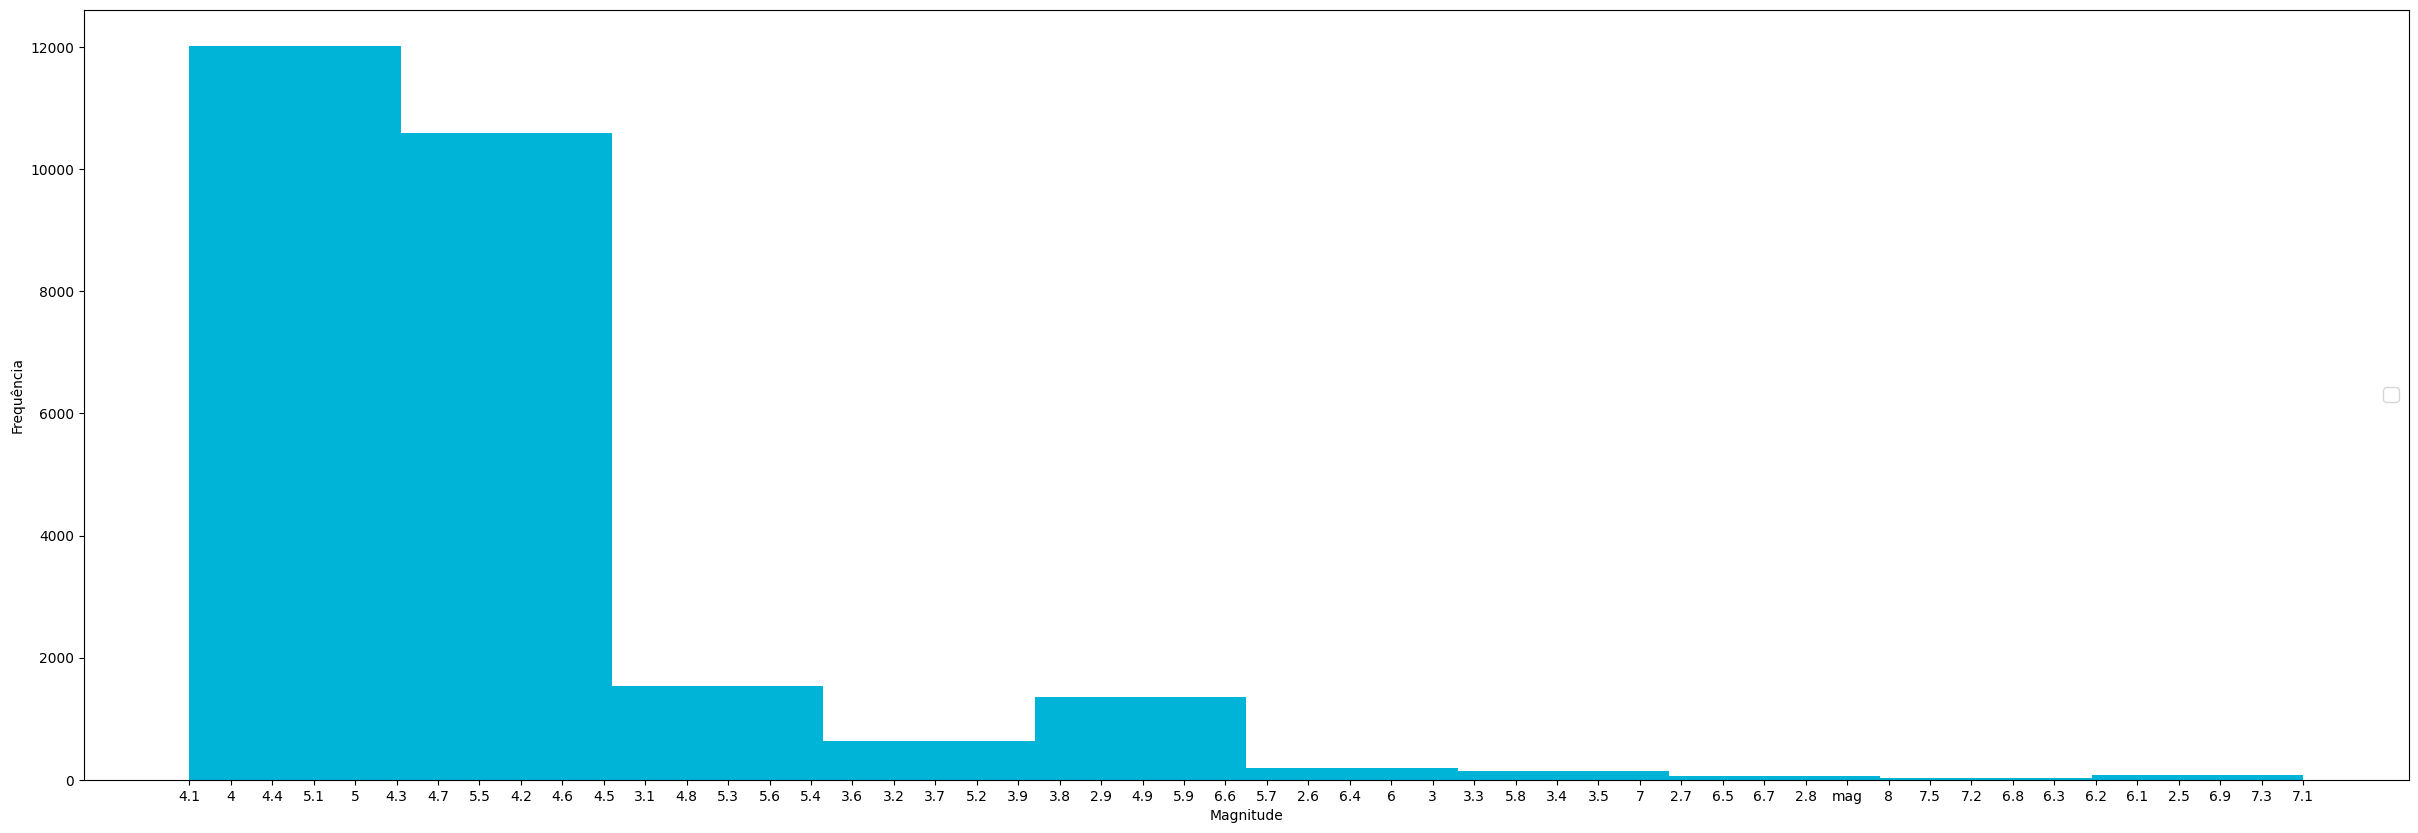

In [ ]:
# Histograma para as variaveis numéricas.
plt.rcParams["figure.figsize"] = (30,10) #redimensionar
plt.legend(['Year'], loc = 'right', fontsize=14)
plt.hist(df_pandas.mag, color='#00b4d8')
plt.xlabel('Magnitude')
plt.ylabel('Frequência')
plt.show()

In [ ]:
df_pandas = df_pandas.dropna(subset=['mag'])

TypeError: ignored

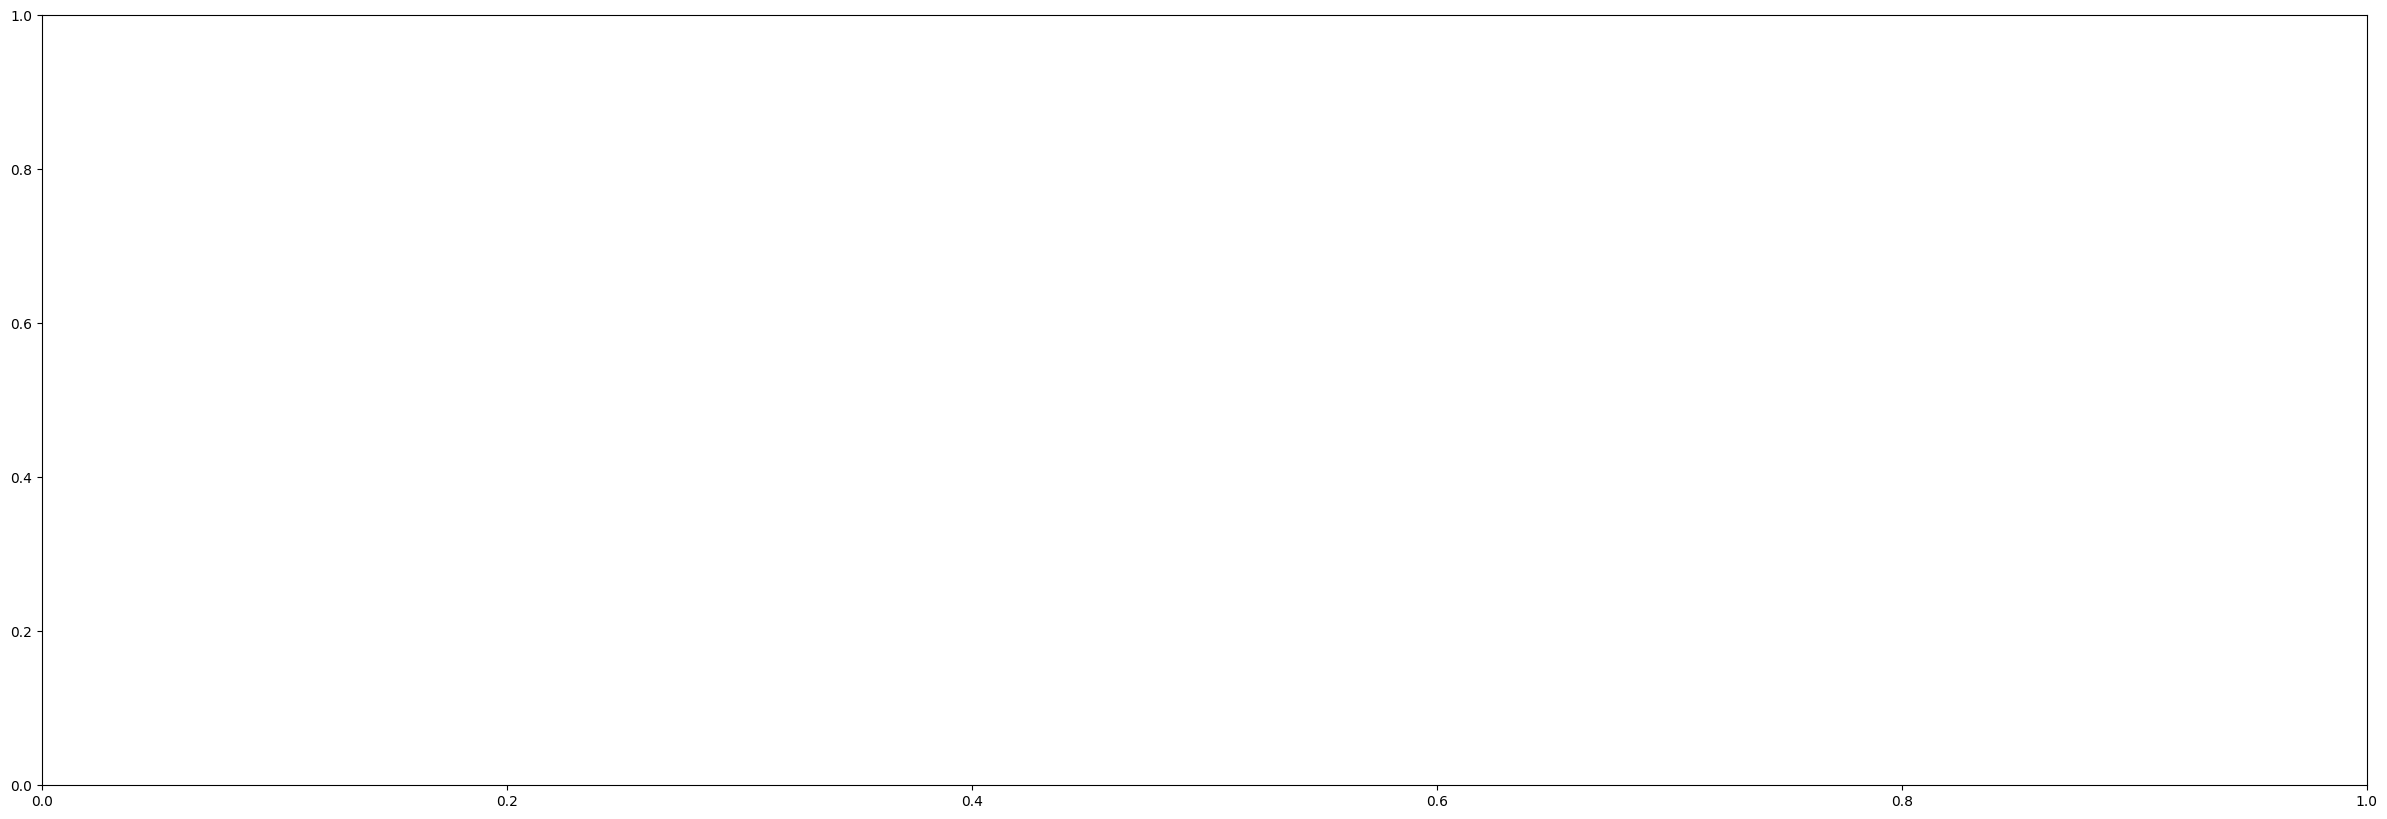

In [ ]:
##plt.boxplot(df_pandas.mag)
##plt.show()

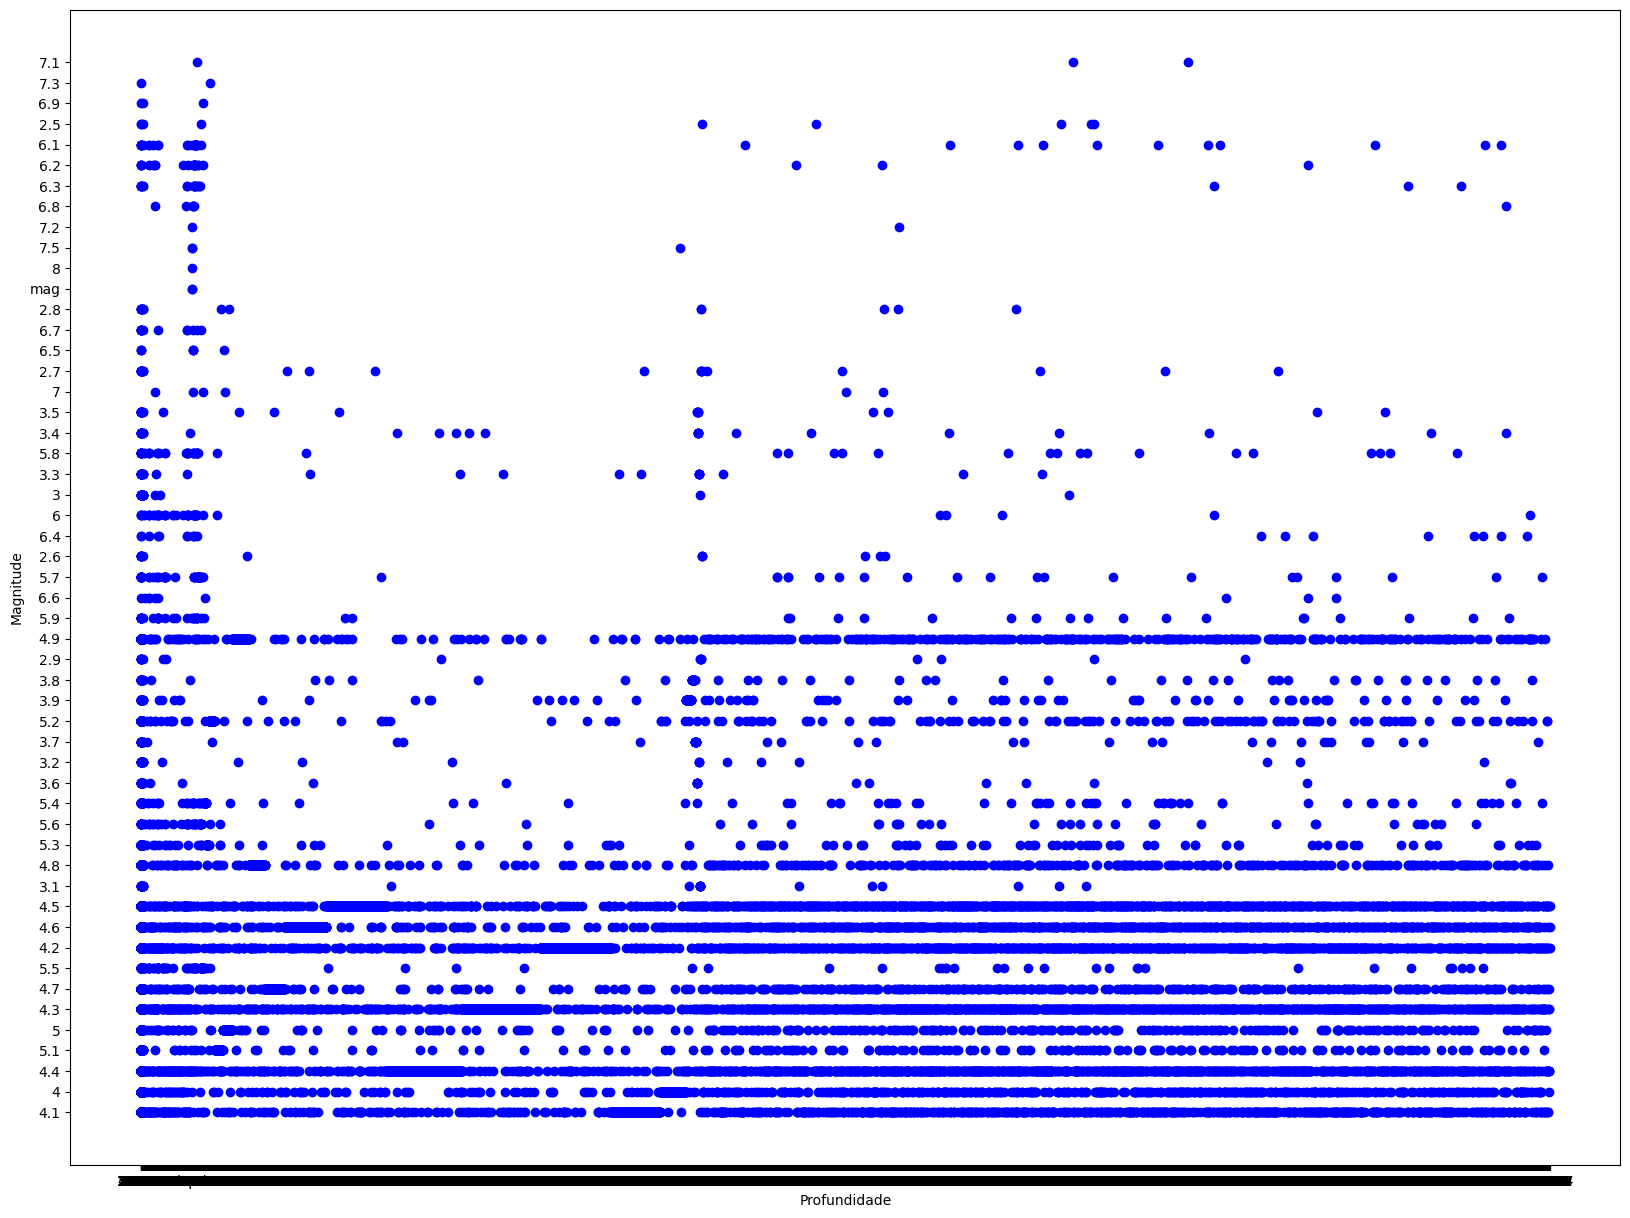

In [ ]:
plt.figure(figsize = (20,15))
plt.scatter(
    df_pandas['depth'],
    df_pandas['mag'],
    c='blue')

plt.xlabel("Profundidade")
plt.ylabel("Magnitude")
plt.show()

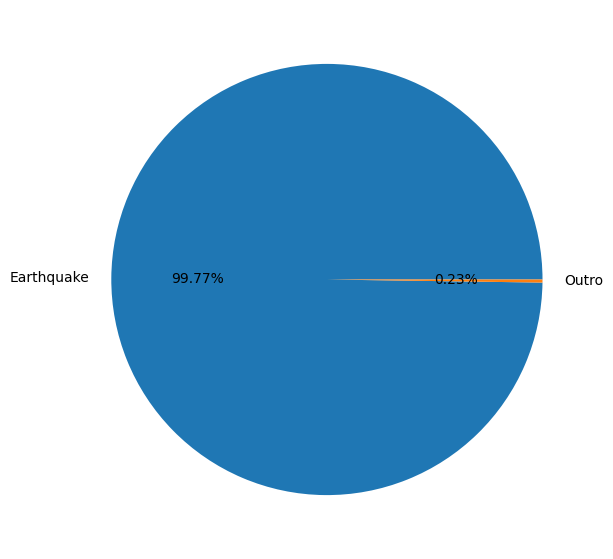

In [ ]:
# Verifcando categorias ou classes
classes_lag_long = df_pandas['type'].value_counts()
nome_classes = ['Earthquake','Outro']
quantidade_classes = [49886,114]
fig = plt.figure(figsize =(7, 7))
plt.pie(quantidade_classes, labels = nome_classes, autopct='%1.2f%%')
plt.show()

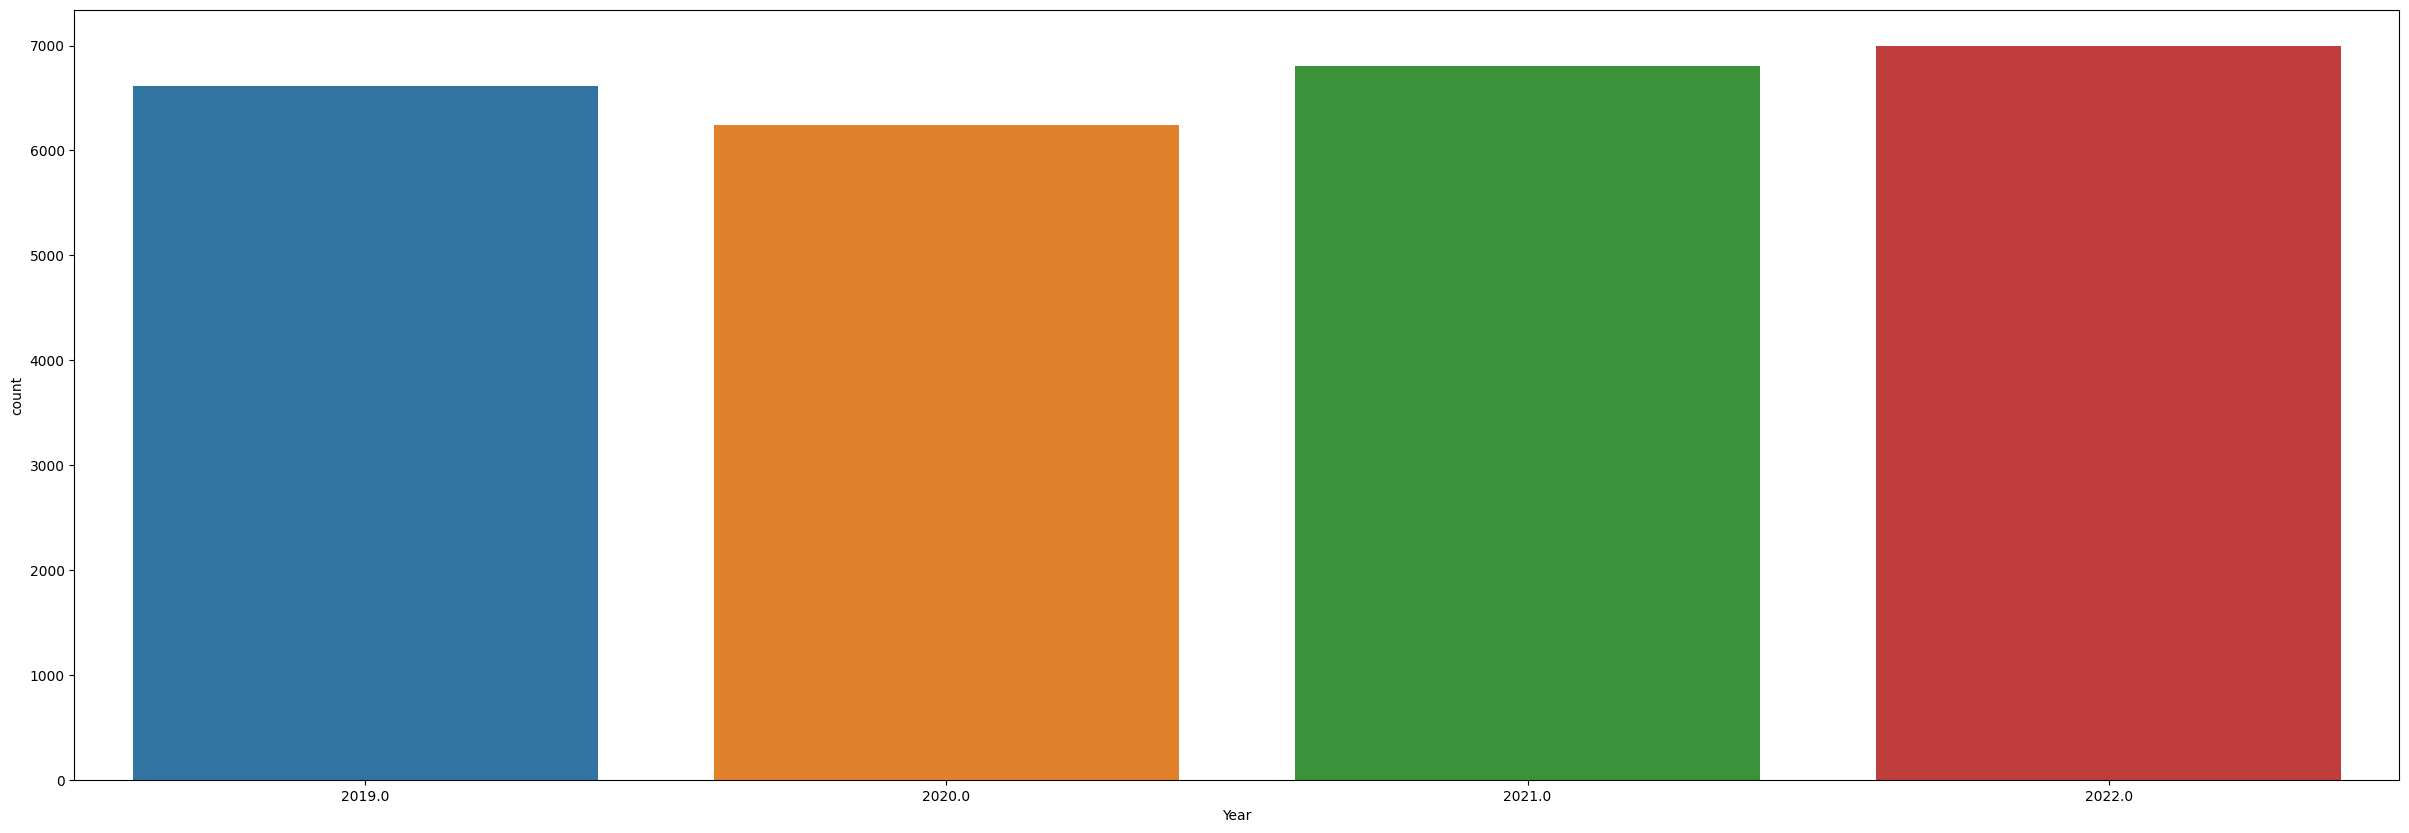

In [ ]:
# Gráfico de barras com seaborn
sns.countplot(x='Year', data=df_pandas)
plt.show()

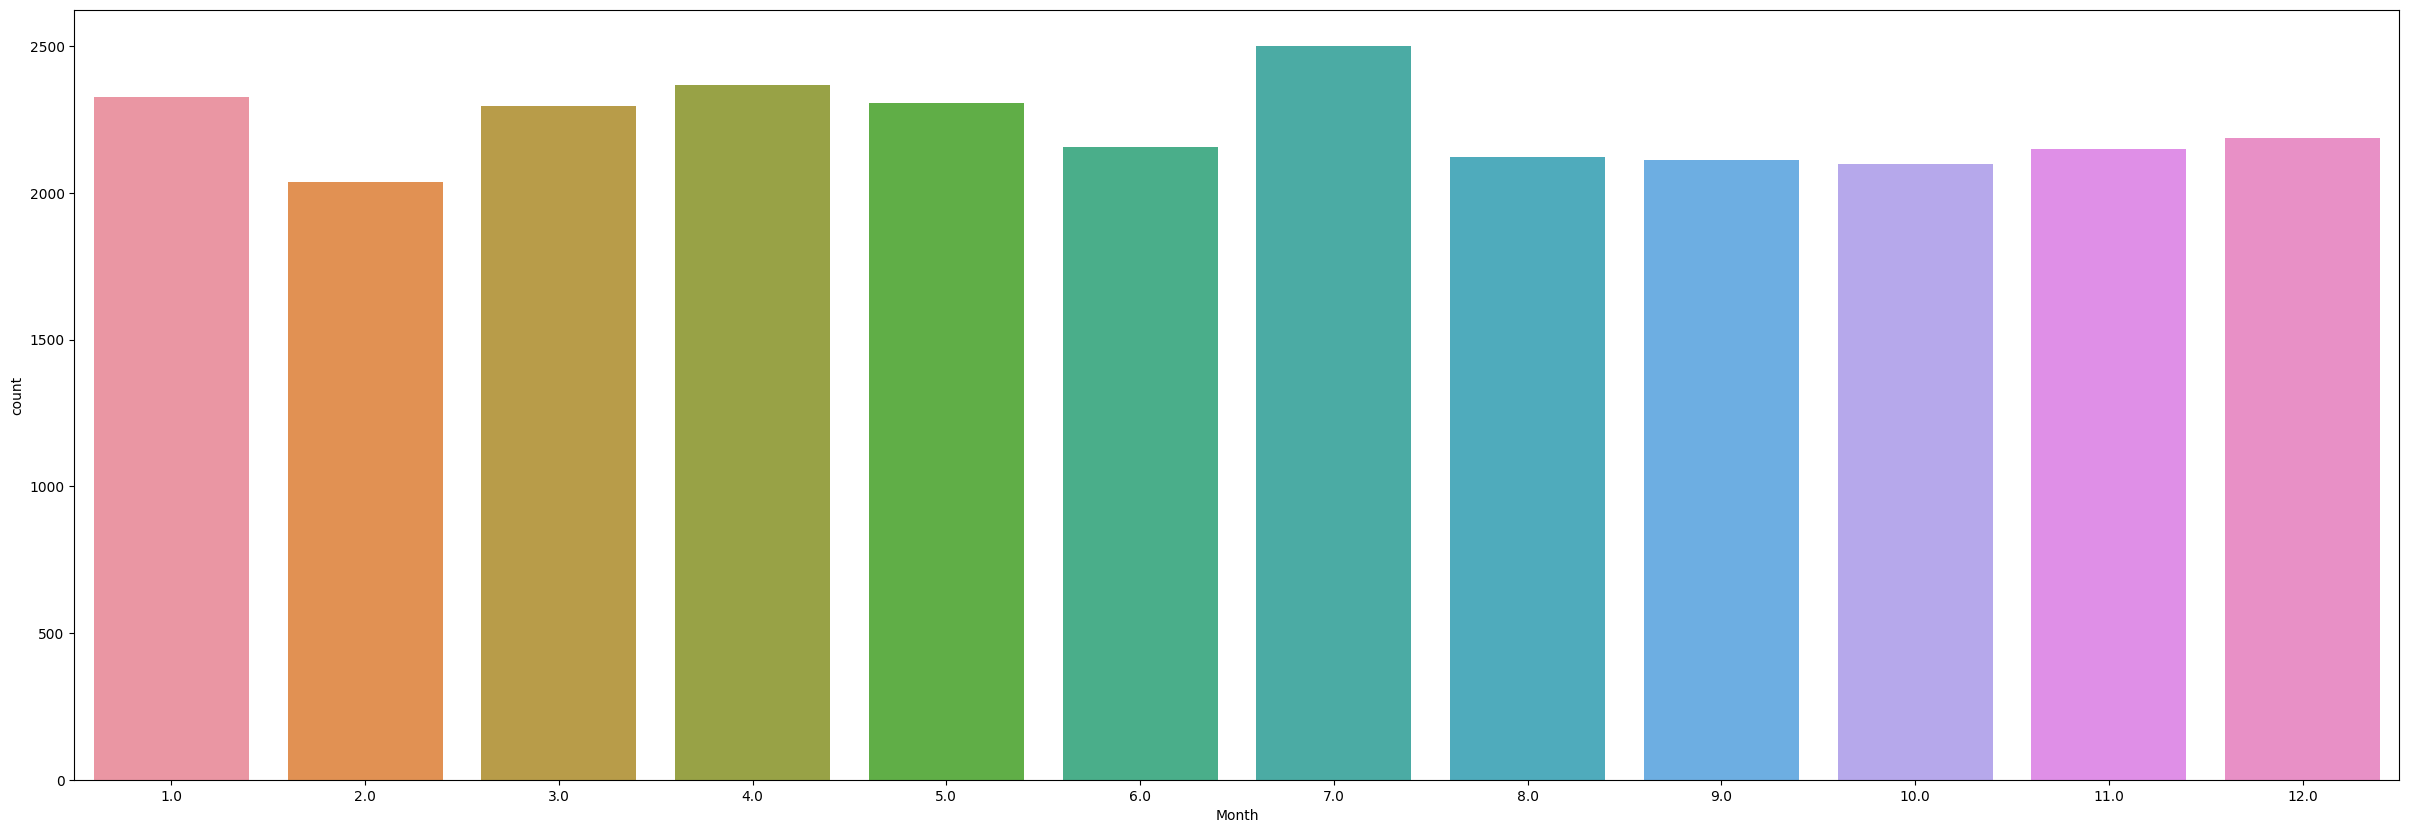

In [ ]:
# Gráfico de barras com seaborn
sns.countplot(x='Month', data=df_pandas)
plt.show()

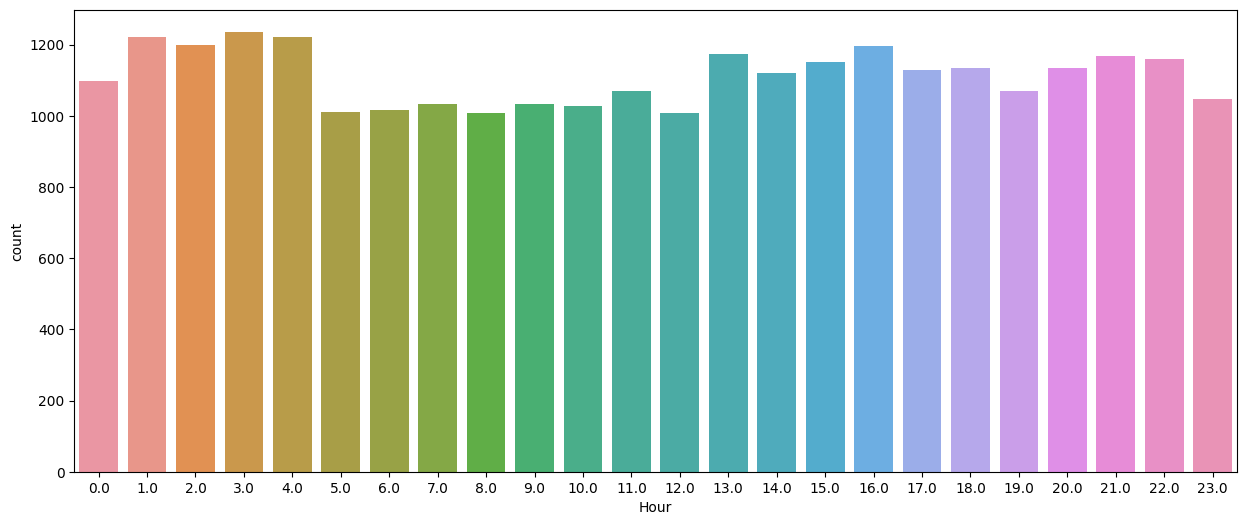

In [ ]:
# Gráfico de barras com seaborn
fig = plt.figure(figsize=(15,6))
sns.countplot(x='Hour', data=df_pandas)
plt.show()

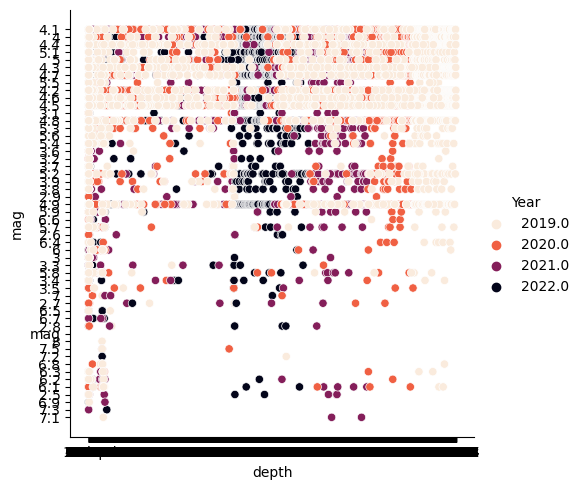

In [ ]:
# Grafico gerado entre magnitide, profundidade e tipo do terremoto.
sns.relplot(
    data=df_pandas,
    x="depth", y="mag", hue="Year", palette="rocket_r")
plt.show()

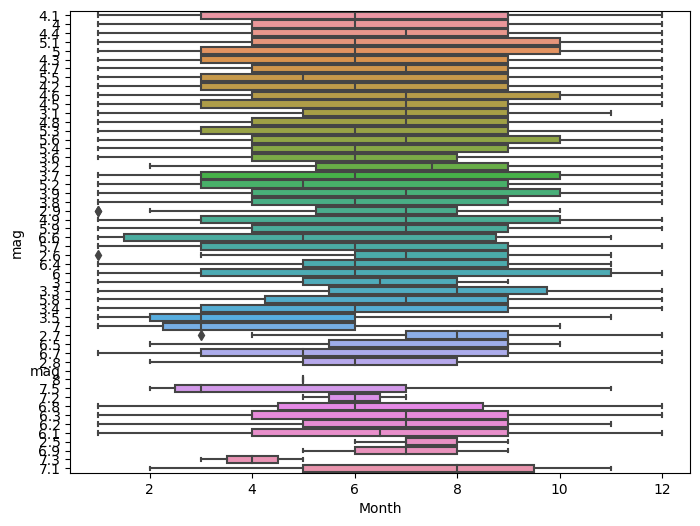

In [ ]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(8, 6))
sns.boxplot(x='Month', y='mag', data=df_pandas)
plt.show()

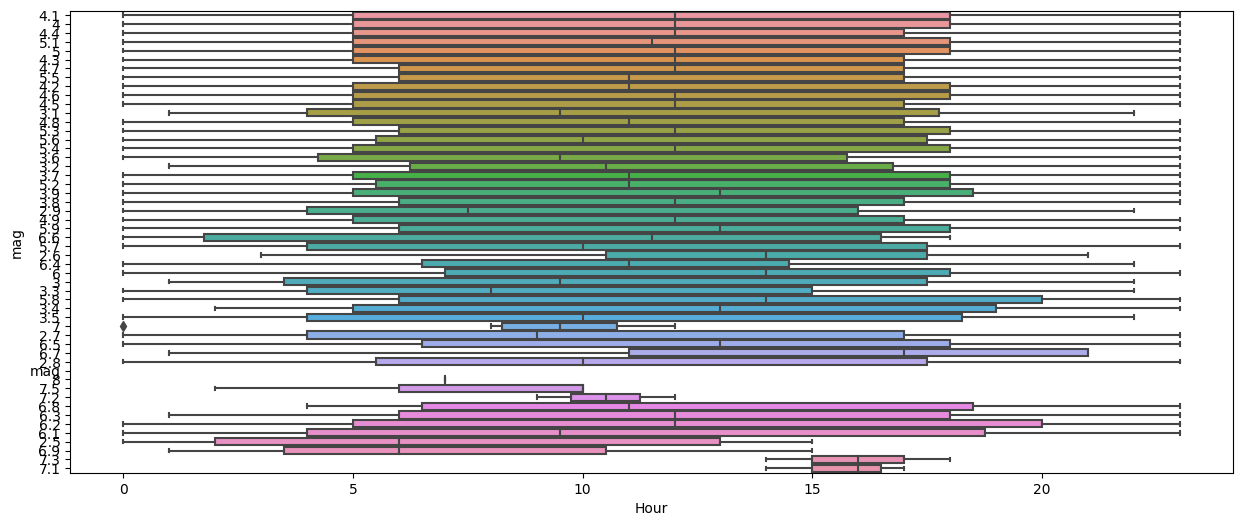

In [ ]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(15, 6))
sns.boxplot(x='Hour', y='mag', data=df_pandas)
plt.show()